## Import libraries

In [1]:
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.model_selection import train_test_split 
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
#import functions
import sys

# Add the directory containing your file to Python's search path
sys.path.append(r'C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\sonorus all')

# Now you can import the function from the file
from Model_evaluation import model_evaluation
from wavenet import wavenet_train, prep_data

## Load data

In [4]:
#import for training
specs_train = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie + physionet\data\nuie_physionet_specs_train.npy")
specs_test = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie + physionet\data\nuie_physionet_specs_test.npy")
outcomes_train = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie + physionet\data\nuie_physionet_outcomes_train.npy")
outcomes_test = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie + physionet\data\nuie_physionet_outcomes_test.npy")

In [8]:
#import for testing each data separately
#get nuie data
train_specs_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\train_nuie_spec_segmented.npy")
train_outcome_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\train_nuie_outcome_segmented.npy")
test_specs_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\test_nuie_spec_segmented.npy")
test_outcome_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\test_nuie_outcome_segmented.npy")
#get physionet data
train_specs_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\sonorus - physionet data\Preprocessed data\Segmented\train_physionet_specs_segmented.npy")
train_outcome_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - physionet data\Preprocessed data\Segmented\train_physionet_outcome_segmented.npy")
test_specs_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\sonorus - physionet data\Preprocessed data\Segmented\test_physionet_specs_segmented.npy")
test_outcome_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - physionet data\Preprocessed data\Segmented\test_physionet_outcome_segmented.npy")

In [3]:
# #old code

# #get nuie data
# specs_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\specs segmented.npy")
# outcome_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\outcome segmented.npy")
# #get physionet data
# specs_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\sonorus - physionet data\Preprocessed data\Segmented\specs_segmented.npy")
# outcome_physionet = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - physionet data\Preprocessed data\Segmented\outcomes_segmented.npy")

# #join both datasets
# #pad zeroes to nuie data 
# specs_nuie_padded = np.zeros((specs_nuie.shape[0],specs_physionet.shape[1],specs_physionet.shape[2]))
# specs_nuie_padded[:specs_nuie.shape[0],:specs_nuie.shape[1],:specs_nuie.shape[2]] = specs_nuie

# #join both datasets
# #pad zeroes to nuie data outcome
# outcome_nuie_padded = np.zeros((outcome_nuie.shape[0],outcome_physionet.shape[1]))
# outcome_nuie_padded[:outcome_nuie.shape[0],:outcome_nuie.shape[1]] = outcome_nuie

# #concatenate
# specs = np.concatenate((specs_nuie_padded,specs_physionet),axis=0)
# outcome = np.concatenate((outcome_nuie_padded,outcome_physionet),axis=0)

# #splitting the data into training and testing
# specs_train, specs_test, outcomes_train, outcomes_test = train_test_split(specs, outcome, test_size=0.2, random_state=42)

## Model

In [5]:
specs_train, specs_test = prep_data(specs_train, specs_test)

In [6]:
#model
wavenet = wavenet_train(specs_train, specs_test, outcomes_train, outcomes_test)

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:359: UserWarning: `build()` was called on layer 'wave_net_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/3
6251/6251 ━━━━━━━━━━━━━━━━━━━━ 4764s 761ms/step - accuracy: 0.6446 - loss: 0.7439 - val_accuracy: 0.6172 - val_loss: 0.6477
Epoch 2/3
6251/6251 ━━━━━━━━━━━━━━━━━━━━ 6351s 1s/step - accuracy: 0.6850 - loss: 0.6066 - val_accuracy: 0.6389 - val_loss: 0.6254
Epoch 3/3
6251/6251 ━━━━━━━━━━━━━━━━━━━━ 4714s 754ms/step - accuracy: 0.7215 - loss: 0.5544 - val_accuracy: 0.6424 - val_loss: 0.6366


Evaluation for both datasets
Threshold: 50
Model Evaluation:
586/586 ━━━━━━━━━━━━━━━━━━━━ 1419s 2s/step
Train set:
Train Accuracy: 0.7794901877133106 | Sensitivity: 0.5052444969714877 | Specificity: 0.9344070766919803


152/152 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step
Test set:
Accuracy:  0.642414220752377 | Sensitivity: 0.36212624584717606 | Specificity: 0.8586598315635299


Threshold: 60
Model Evaluation:
586/586 ━━━━━━━━━━━━━━━━━━━━ 1383s 2s/step
Train set:
Train Accuracy: 0.7792768771331058 | Sensitivity: 0.5723149652829074 | Specificity: 0.8961862638738213


152/152 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step
Test set:
Accuracy:  0.6523356758991319 | Sensitivity: 0.4371143806359753 | Specificity: 0.8183815452215306




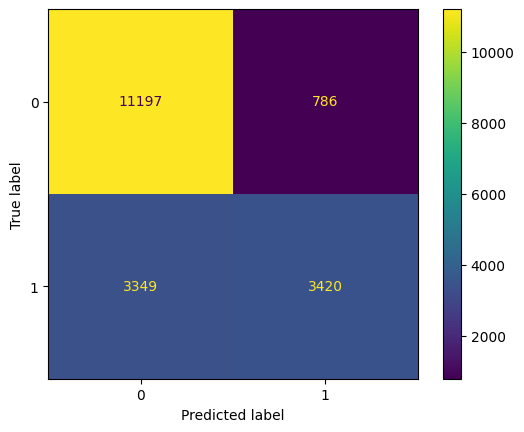

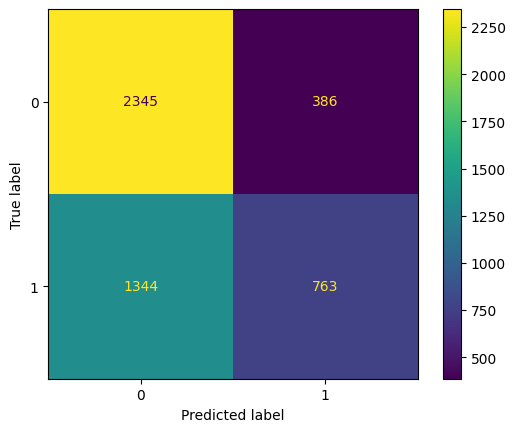

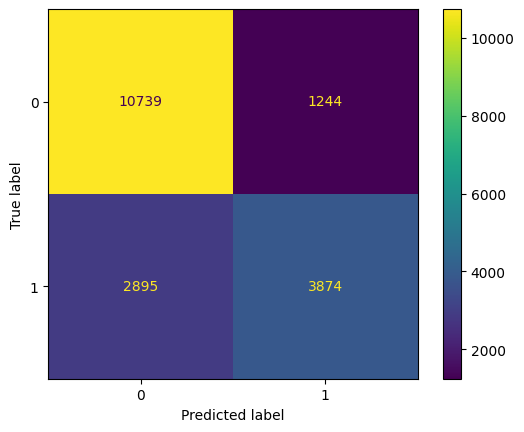

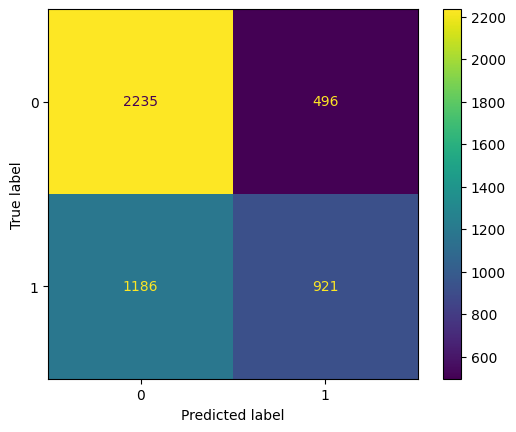

In [7]:
#from Model_evaluation import model_evaluation
#evaluate for both datasets
print("Evaluation for both datasets")
print("Threshold: 50")
model_evaluation(wavenet, specs_train, specs_test, outcomes_train, outcomes_test, threshold=0.50, evaluate=False, reshape_outcome=True)
print("\n")

print("Threshold: 60")
model_evaluation(wavenet, specs_train, specs_test, outcomes_train, outcomes_test, threshold=0.60, evaluate=False, reshape_outcome=True)
print("\n")

Evaluation for physionet data
Model Evaluation:
393/393 ━━━━━━━━━━━━━━━━━━━━ 989s 3s/step
Train set:
Train Accuracy: 0.7438694267515924 | Sensitivity: 0.584515467441463 | Specificity: 0.88284394097481


103/103 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step
Test set:
Accuracy:  0.5617021276595745 | Sensitivity: 0.4194612424409016 | Specificity: 0.7375934738273283


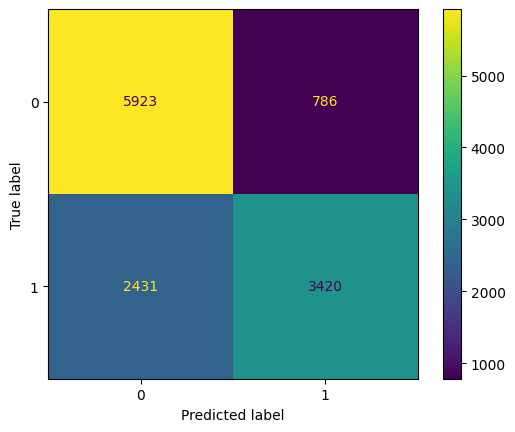

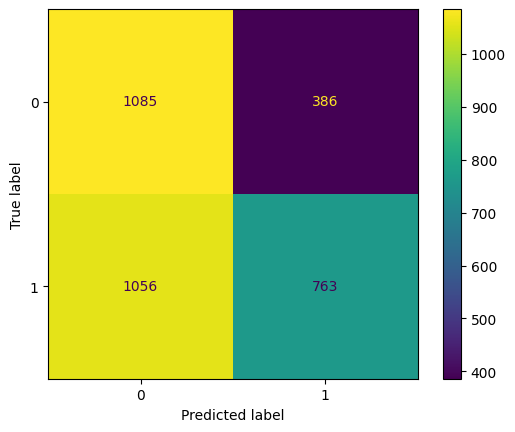

In [9]:
print("Evaluation for physionet data")
train_specs_physionet, test_specs_physionet = prep_data(train_specs_physionet,test_specs_physionet)
model_evaluation(wavenet, train_specs_physionet, test_specs_physionet, train_outcome_physionet, test_outcome_physionet, threshold=0.50, evaluate=False, reshape_outcome=True)

Evaluation for physionet data
Model Evaluation:
393/393 ━━━━━━━━━━━━━━━━━━━━ 997s 3s/step
Train set:
Train Accuracy: 0.7435509554140127 | Sensitivity: 0.6621090411895403 | Specificity: 0.8145774332985541


103/103 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step
Test set:
Accuracy:  0.5762917933130699 | Sensitivity: 0.5063221550302364 | Specificity: 0.6628144119646499


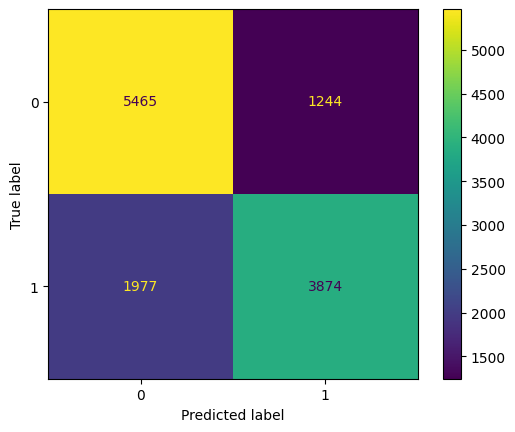

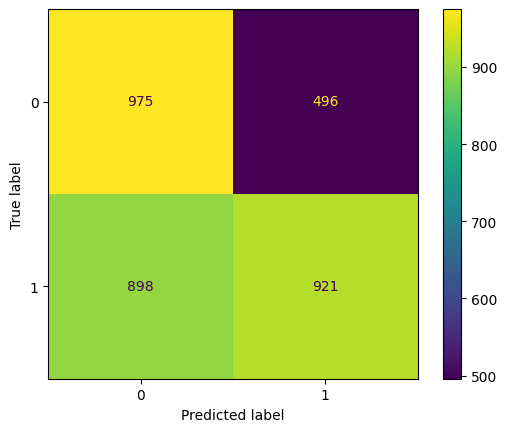

In [10]:
print("Evaluation for physionet data")
train_specs_physionet, test_specs_physionet = prep_data(train_specs_physionet,test_specs_physionet)
model_evaluation(wavenet, train_specs_physionet, test_specs_physionet, train_outcome_physionet, test_outcome_physionet, threshold=0.60, evaluate=False, reshape_outcome=True)

Evaluation for nuie data
Model Evaluation:
194/194 ━━━━━━━━━━━━━━━━━━━━ 507s 3s/step
Train set:
Train Accuracy: 0.8517441860465116 | Sensitivity: 0.0 | Specificity: 1.0


49/49 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step
Test set:
Accuracy:  0.813953488372093 | Sensitivity: 0.0 | Specificity: 1.0


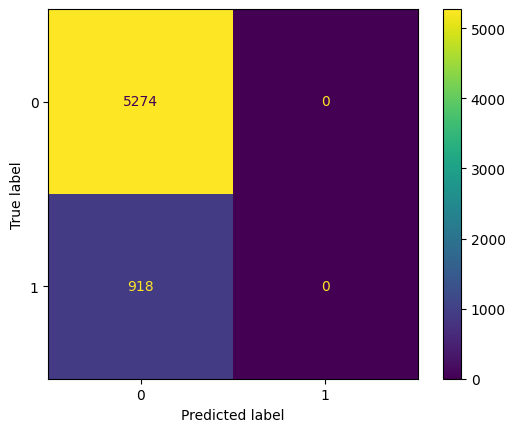

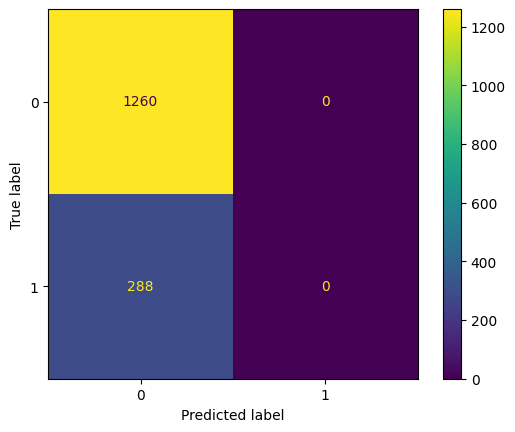

In [11]:
print("Evaluation for nuie data")
train_specs_nuie, test_specs_nuie = prep_data(train_specs_nuie,test_specs_nuie)
model_evaluation(wavenet, train_specs_nuie, test_specs_nuie, train_outcome_nuie, test_outcome_nuie, threshold=0.60, evaluate=False, reshape_outcome=True)